# Efforts to understand Gaussian Process

- toc: true
- categories: [Statistics]
- comments: true
- author: Hyunho Lee

Gaussian Process를 이해해보고자 작성하였습니다.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

먼저, 그나마 익숙한 Univariate Gaussian Distribution을 다뤄보겠습니다. 

분포는 다음과 같이 표현됩니다.

$$ f( x \mid \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2 \pi} }exp(-\frac{1}{2}(\frac{x - \mu}{\sigma})^2)$$

$\mu$ = 0, $\sigma^2$ = 1인, gaussian distribution을 그려보면 아래와 같습니다. 그런데 이 경우는 우리가 gaussian distribution의 pdf와 매개변수(parameter; $\mu$, $\sigma$)를 알고 있는 상태에서 그 pdf를 그린 것 뿐입니다.

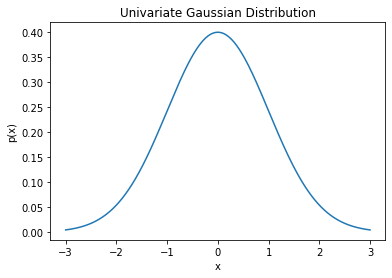

In [ ]:
# Plot Univariate Gaussian Distribution
def gaussian_distribution(m, var, n=1000):
  # 평균을 중심으로 -3 sigma ~ 3 sigma 만큼 범위를 지정합니다. 
  x_values = np.linspace(-3 * np.sqrt(var) + m, 3 * np.sqrt(var) + m, n).flatten()

  # 계산편의를 위해 표준편차를 구합니다.
  sd = np.sqrt(var)

  # 지정된 범위의 x값들을 입력으로 y값을 구합니다.
  y_values = (1/(np.sqrt(2 * np.pi) * sd) * np.exp((-1/2) * ((x_values - m) / sd) ** 2))
  return (x_values, y_values)

x_values, y_values = gaussian_distribution(m = 0, var = 1)

plt.plot(x_values, y_values)
plt.title('Univariate Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

위 방식과 달리, Gaussian distribution을 따르도록 랜덤하게 값들을 생성하고(확률변수에서 어떤 값을 realization하는 것과 유사) 그것을 다시 gaussian distribution으로 그려보겠습니다.

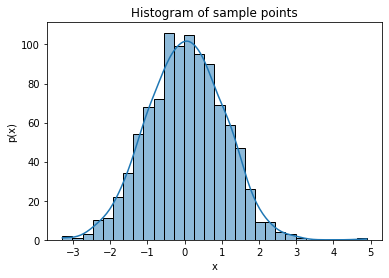

In [ ]:
# Generate points from Univariate Gaussian Distribution
mean = 0
var = 1
number_of_sample = 1000

# 분포에서 샘플을 뽑는다. distribution -> sample points
samples = np.random.normal(mean, var, number_of_sample) 

# 히스토그램 시각화
sns.histplot(samples, kde=True)

plt.title('Histogram of sample points')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

In [ ]:
# 샘플에서 gaussian distribution의 parameter를 계산

mean = np.mean(samples)
var = np.var(samples)
print(mean)
print(var)

0.0309398551492285
1.0492648745287858


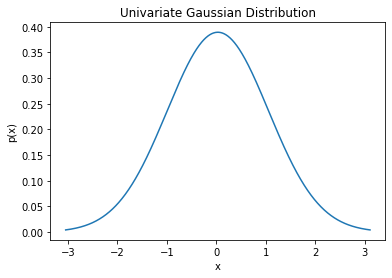

In [ ]:
# 샘플에서 파라메터(평균, 분산)을 계산하고, 그것을 이용하여 분포를 그린다.

x_values, y_values = gaussian_distribution(m = mean, var = var)

plt.plot(x_values, y_values)
plt.title('Univariate Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

지금까지 1) Univariate Gaussian Distribuion의 pdf를 이용하여 분포를 그려보고, 2) 또한 Univariate Gaussian Distribution을 따르는 데이터를 생성시킨 후 분포를 그려보았습니다.

---

여기서 확장하여 Multivariate Gaussian Distribution을 다뤄보겠습니다. 저는 아무런 감이 없으므로, 앞의 경우와 동일하게 해보겠습니다. Multivariate Gaussian Distribution은 pdf는 아래와 같습니다. $x_1$, $\cdots$, $x_n$이 각각 gaussian distribution을 따르는 분포입니다. 

(수학자들은 천재이고, 수학은 신기한 것 같습니다. 저는 수학에 크게 아름다움을 느끼지는 못하지만, Multivariate Gaussian Distribution을 보면서는 그런 생각이 언뜻언뜻 드는 것 같습니다. 아직도 이해를 다하지는 못했지만요...)


$$ f( x_1, \cdots ,x_n \mid \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^n \lvert \Sigma \rvert} }exp(-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu))$$


이제, 가장 단순한 경우인, n = 2인 경우를 가정하겠습니다. (이 경우를 Bivariate Gaussian Distribution이라고도 부릅니다.) $f(x_1, x_2 \mid \mu, \Sigma)$가 Multivariate Gaussian Distribution이라고 하면, $x_1$과 $x_2$는 각각 Gaussian Distribution을 만족합니다. 그리고 파라메터는 아래와 같이 표현됩니다.

$$ \mu =  
\begin{bmatrix}
      \mu_1\\
      \mu_2\\    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      \sigma_{11} & \sigma_{12} \\
      \sigma_{21} & \sigma_{22}   
\end{bmatrix} $$

그런데 여기서 저 같이 벡터에 익숙하지 않은 사람들은 $\mu$와 $\Sigma$에 대해 슬슬 혼돈이 오기 시작합니다. 일단 결론부터 말하면 Univariate Gaussian Distribution과 달리 파라메터의 형태가 scalar가 아니라 vector 또는 matrix형태로 오게 됩니다. 그런데 생각해보면 2개의 랜덤변수를 다루니 각각의 데이터의 특성을 표현하기 위해서는 그렇게 사용하는 것이 언뜻 이해가 될 것 같기도 합니다. $\mu$는 $x_1$과 $x_2$을 가지는 벡터이고, $\Sigma$는 n x n 형태로, 각각의 데이터간의 공분산을 계산한 값입니다. 

조금 수준낮은 이야기를 하면, 여기서 저만 헷갈린것일수 있겠지만, Univariate Gaussian Distribution에서 사용하는 $\sigma^2$는 Multivariate Gaussian Distribution에서 사용하는 $\sigma_{11}, \sigma_{12}$ 등과 같은 표현입니다. $\sigma^2$는 $\sigma_{xx}$라고 이해했습니다. 또한, 1,2를 x,y로 바꿔보면 공분산 배울때 사용했던 notation과 동일해짐을 알 수 있습니다. 그것을 배울때 왜 cov(x,y)를 그렇게 계산하나 했더니 여기 쓰는 것이네요 ㅠㅠ 기왕 말나온김에 cov(x,y)형태로 바꿔써보면 아래와 같습니다.
$$
\Sigma =  
\begin{bmatrix}
      cov(x_1, x_1) & cov(x_1, x_2) \\
      cov(x_2, x_1) & cov(x_2, x_2)   
\end{bmatrix} $$

여기서 조금 더 저의 생각을 정리 해보면, (분포 $\rightarrow$ 데이터)가 되는 경우가 있고(realization), (데이터 $\rightarrow$ 분포)가 되는 경우(parmeter estimation)가 있습니다. 이 두가지가 하나의 pdf와 파라메터들로 표현되다보니 다소 헷갈릴 때가 많은데요. 파라메터중에 무엇이 conditional(주어진 값)이고, 무엇이 변수로 놓여있는지 항상 유의깊게 봐야할 것 같습니다.

---

이제부터 n = 2인 경우의 몇가지 Multivariate Gaussian Distribution을 그려보겠습니다. 이 경우는 파라메터가 주어지고, 분포에서 특정 데이터를 생성하는 realization에 해당하는 경우네요, 즉 $\mu$와 $\Sigma$가 주어진 경우입니다.

 그런데 여러 서적에서 mean보다는 covariance matrix가 훨씬 중요하다는 말들을 많이 해서, mean보다는 covariance matrix의 형태에 따라 Multivariate Gaussian이 어떻게 변화하는지를 살펴보겠습니다. 또 직관적으로 생각해보면 $\mu$는 분포의 중심점이 바뀌는 것이지만, $\Sigma$는 분포의 모양을 바꾸는 것이니 그럴 것 같기도 합니다. 

In [ ]:
# m.shape = 2, cov.shape = (2,2)임

def bivariate_gaussian_distribution(m, cov, n=100):
  # 각 축의 평균을 중심으로 -3 sigma ~ 3 sigma 만큼 범위를 지정합니다. 
  var_max = np.max([np.sqrt(cov[0, 0]), np.sqrt(cov[1][1])])
  x1 = np.linspace(-3 * var_max + m[0], 3 * var_max + m[0], n)
  x2 = np.linspace(-3 * var_max + m[1], 3 * var_max + m[1], n)
  X1, X2 = np.meshgrid(x1, x2)
  
  # multivariate gaussian distribution pdf 계산하는 함수(numpy 최고!)
  def bivariate_gaussian_pdf(x, m, cov):
    return np.exp((-1/2) * ((x - m).T @ np.linalg.inv(cov) @ (x - m))) / ( 2 * np.pi * np.sqrt(np.linalg.det(cov)))

  # for each point in the meshgrid, calculate pdf
  pdf = np.zeros(X1.shape)
  for i in range(n):
    for j in range(n):
      pdf[i,j] = bivariate_gaussian_pdf([X1[i,j], X2[i,j]], m, cov)
     
  return X1, X2, pdf


1) 평균이 (0, 0)이고, $x_1$과 $x_2$가 서로 uncorrelated된 Multivariate Gaussian Distribution 

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      1 & 0 \\
      0 & 1   
\end{bmatrix} $$

사족1. 공분산 배웠던 시간에 cov(x,y) = 0이면, uncorrelated라고 배웠던 것 같습니다. 그냥 갑자기 쓸데없이 생각나는 내용을 붙이면, 독립이면 uncorrelated하지만, uncorrelated하다고 해서 독립이지는 않습니다.

사족2. 이렇게 방향성에 상관없이 그 값(분산)이 같은 경우를 isotropic이라고 부릅니다. 





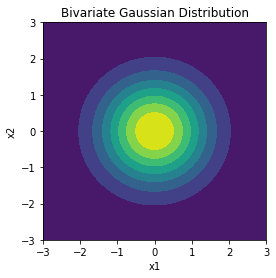

In [ ]:
# 1번 케이스
m = np.array([0, 0])
cov = np.array([[1, 0], 
                [0, 1]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

2) 평균이 (0, 0)이고, $x_1$과 $x_2$가 서로 uncorrelated된 Multivariate Gaussian Distribution인데, 분산의 크기가 다른 경우, 두 변수가 서로 uncorrelated이기 때문에 각 변수의 축방향으로 분포가 커짐을 확인할 수 있습니다.

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      5 & 0 \\
      0 & 1   
\end{bmatrix} $$

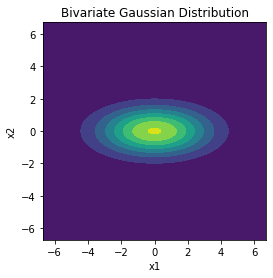

In [ ]:
# 2번 케이스
m = np.array([0, 0])
cov = np.array([[5, 0], 
                [0, 1]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

3) 평균이 (0, 0)이고, $x_1$과 $x_2$가 서로 uncorrelated된 Multivariate Gaussian Distribution인데, 분산이 1이 아니면서, 크기가 다른 경우에도, 2번 케이스와 동일하게 두 변수가 서로 uncorrelated이기 때문에 각 변수의 축방향으로 분포가 커짐을 확인할 수 있습니다. 

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      100 & 0 \\
      0 & 500   
\end{bmatrix} $$

즉, 각 확률변수의 분산이 어떻든간에, 서로 uncorrelated한 경우($\sigma_{12} = \sigma_{21} = 0$ )에는 각 확률변수의 축방향으로 분산이 커지게 되는 것을 확인할 수 있었습니다.

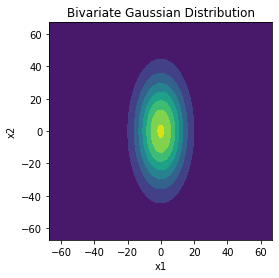

In [ ]:
# 3번 케이스
m = np.array([0, 0])
cov = np.array([[100, 0], 
                [0, 500]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

4) 평균이 (0, 0)이고, $x_1$과 $x_2$가 서로 강하게 correlated된(0.9) Multivariate Gaussian Distribution의 경우 x1과 x2의 45도 방향으로 퍼지는 형태로 분포의 모양이 형성됩니다.

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      1 & 0.9 \\
      0.9 & 1   
\end{bmatrix} $$

사족3. 책을 읽다보면 covariance matrix는 symmetric이고 postive semi  definite이라는 표현이 나옵니다. 공분산은 정의상 $\sigma_{12} = \sigma_{21}$ 이고(symmetric), 계산된 값은 관측데이터와 평균의 차이의 제곱이기 때문에 0 또는 0보다 큰 값을 가질 수 밖에 없습니다. 


사족4. 통계를 배우다보면 나오는 강한 양의 상관관계와 유사한 그래프가 나오는데, 다만, 이그림은 3차원(X1, X2, pdf)을 2차원형태의 contour그래프로 표현했다는 점에서 혼동이 없기를 바랍니다.

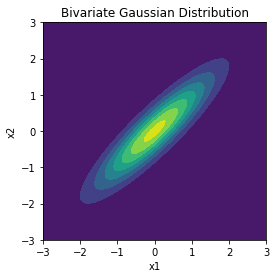

In [ ]:
# 4번 케이스
m = np.array([0, 0])
cov = np.array([[1, 0.9], 
                [0.9, 1]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

5) 평균이 (0, 0)이고, $x_1$과 $x_2$가 서로 적당히 correlated된(0.5) Multivariate Gaussian Distribution의 경우 x1과 x2의 45도 방향으로 퍼지는 형태로 분포의 모양이 형성됩니다. 4번 케이스보다는 다소 -45도 방향으로 넓어진 모양입니다.

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      1 & 0.5 \\
      0.5 & 1   
\end{bmatrix} $$

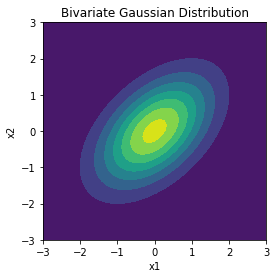

In [ ]:
# 5번 케이스
m = np.array([0, 0])
cov = np.array([[1, 0.5], 
                [0.5, 1]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

6) 평균이 (0, 0)이고, $x_1$과 $x_2$가 서로 약하게 correlated된(0.1) Multivariate Gaussian Distribution의 경우 x1과 x2의 45도 방향으로 퍼지는 형태로 분포의 모양이 형성됩니다. 5번 케이스보다는 더 -45도 방향으로 넓어진 모양이고 거의 원에 가까운 모양으로 처음 시작했던 1번 케이스에 가까운 모양입니다.

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      1 & 0.1 \\
      0.1 & 1   
\end{bmatrix} $$

즉, covariance가 클수록 각 변수 축의 45도 방향으로 강하게 분산이 형성되고, 그렇지 않을 경우, 각 축의 방향으로 분산이 형성되는 것을 확인할 수 있었습니다.

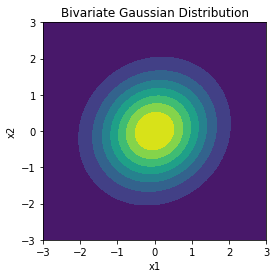

In [ ]:
# 6번 케이스
m = np.array([0, 0])
cov = np.array([[1, 0.1], 
                [0.1, 1]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

7) $x_1$과 $x_2$의 각각의 분산이 같고 서로 correlated된 Multivariate Gaussian Distribution의 경우 x1과 x2의 45도 방향으로 퍼지는 형태로 분포의 모양이 형성된다고 했습니다. 다만, 이때 x1축으로 분산이 커지게 될 경우, 45도 각도(1:1)가 아닌 5:1정도에 해당하는 각도로 x1축으로 조금 더 퍼진 모양으로 그림이 나타나게 됩니다.

$$ \mu =  
\begin{bmatrix}
      0 \\
      0    
\end{bmatrix},  \Sigma =  
\begin{bmatrix}
      5 & 0.9 \\
      0.9 & 1   
\end{bmatrix} $$

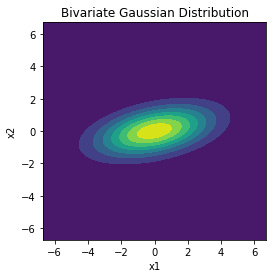

In [ ]:
# 7번 케이스
m = np.array([0, 0])
cov = np.array([[5, 0.9], 
                [0.9, 1]])

X1, X2, pdf = bivariate_gaussian_distribution(m, cov)

plt.figure(figsize=(4, 4))
plt.contourf(X1, X2, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Bivariate Gaussian Distribution')
plt.show()

지금까지 $\mu$와 $\Sigma$가 주어졌을 때 나타는 Bivairate Gaussian Distribution의 모양을 그림들을 그려보면서 살펴보았습니다.

느낀점들을 최종 정리를 해보면,

1) x1과 x2가 uncorrelated된 경우(공분산 = 0) 각각의 분산의 크기만큼 x1축과 x2축으로 길쭉한 형태의 모양이 형성됩니다. 평균을 중심으로 x1축과 x2축에서 모두 고르게 값이 나타납니다.

2) x1과 x2가 corrleated된 경우(공분산 > 0) 각 축의 분산의 크기에 비례하여 x1축과 x2축사이로 값들의 분포가 형성되며, 분산이 형성되는 모양의 집적도(?)는 공분산의 크기가 강할수록 강해집니다. 즉, covariance가 클수록 x1과 x2에서 realization된 값 간의 선형성이 강할 것 같습니다.(제가 느낀 점을 표현한 것이라 틀릴 수 있습니다)

---

Gaussian Process에 대한 많은 표현들이 있는데요, 일단 아직 GP를 완벽히 이해한 것이 아닌 상태이기 때문에, 추가로 공부한 내용은 이후에 업데이트 하기로 하고, 일단 그냥 해보겠습니다. 일단 아래의 정의에서부터 시작해서 그냥 그림부터 그려보겠습니다.

$f \sim GP(m(x), k(x,x'))$



m(x)는 x지점에서의 mean function, k(x,x')은 두 점들 사이의 covariance matrix를 의미합니다.

x는 실제로는 실수영역이지만, 그림을 그려보기 위해 [0,1]에서 10개의 point를 discreate하게 생성해보겠습니다. 이것을 x 벡터라고 하겠습니다. x의 각 포인트에서 function f(x)의 평균은 0으로, covariance matrix는 임의의 커널함수들을 사용하여 x 벡터안에 포함된 각 값들간의 covariance matrix를 셋팅하였습니다. 

그리고 그 mean과 covariance maxtrix를 파라메터로 하는 10개의 랜덤변수로 이루어진 multivariate gaussian distribution에서 값을 realization하여 생성한 벡터를 y라고 하고, $(x, y)$형태로 그래프를 그려보겠습니다.

kernel1 과 kernel2는 임의의 kernel function 수식을 활용하였고, kernel3은 각 지점에서의 생성된 y 값들이 서로 uncorrelated한 경우입니다.

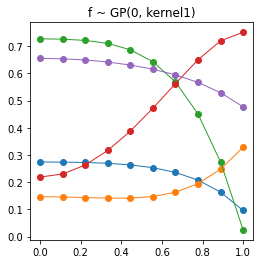

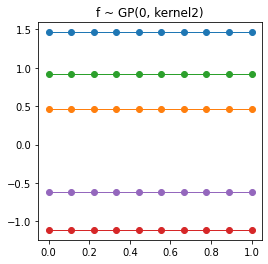

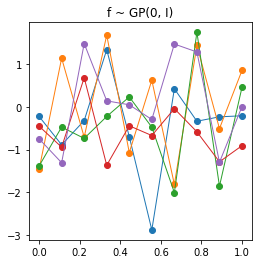

In [32]:
# Define the kernel function
def kernel1(x1, x2):
  return np.exp(np.outer(x1 ** 2, x2 ** 2) / np.dot(x1, x2)) 
  
def kernel2(x1, x2):
  return np.exp((-1/2) * (np.outer((x1 - x2), (x1 - x2))))

def kernel3(x1, x2):
  return np.eye(len(x1))

def plot_gaussian_process(kernel, number_of_samples, title):
  n = 10
  xvalues = np.linspace(0, 1, n)
  mean = np.zeros(n)
  #mean = xvalues ** 2
  cov = kernel(xvalues, xvalues) 
  yvalues = np.random.multivariate_normal(mean, cov, number_of_samples)
  
  plt.figure(figsize=(4, 4))
  for i in range(number_of_samples):
    plt.plot(xvalues, yvalues[i], '-o', linewidth=1)
  plt.title(title)
  plt.show()

# f ~ GP(m(x), k(x,x'))에서 x가 주어질때 조건을 만족하는 f가 튀어나온다고 생각해보자. 
# 일단 k(x,x')에만 집중해서, m(x) = 0이라고 하고 그리는데 집중해보자
# 적절하게 kernel function이 주어지면, smooth한 function line이 생성된다. (case 1,2)
# 서로 uncorrleated할때는 무작위로 라인이 그려진다.(case 3)

number_of_realization = 5
plot_gaussian_process(kernel1, number_of_realization, "f ~ GP(0, kernel1)")
plot_gaussian_process(kernel2, number_of_realization, "f ~ GP(0, kernel2)")
plot_gaussian_process(kernel3, number_of_realization, "f ~ GP(0, I)")


위 코드를 실행할 때마다 주어진 $\mu$와 $\Sigma$을 파라메터로 하는 multivariate gaussian distribution이 생성됩니다. 일단 이번 코드는 여기까지로 하겠습니다. 

이후에 bayesian linear regression과 gaussian process 그리고 gaussian process를 prior로 해서 값을 inference하는 것간의 관계에 대해 좀 더 명확히 이해하여, 다시 정리해보고자 합니다.